In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
os.getcwd()
os.chdir('/Users/susovan/Desktop/springboard doc')

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Data Loading
df = pd.read_csv('datasets_666204_1173952_Walmart_Store_sales.csv')


In [3]:
#Data Organization
os.mkdir('Walmart Sales Project')

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:

values_to_remove = [1611968.17,1409727.59 ,42.31,64.88]

In [6]:
df_sub = df.applymap(lambda x:np.nan if x in values_to_remove else x)

In [7]:
df_sub

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,NaN,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,NaN,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,NaN,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,NaN,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [8]:
#Data Definition
df_sub.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [9]:
df_sub.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6433 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6431 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [12]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [13]:
df_sub.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.433000e+03,6435.000000,6431.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046821e+06,0.069930,60.668179,3.358607,171.578394,7.999151
std,12.988182,5.643922e+05,0.255049,18.447679,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.529853e+05,0.000000,47.500000,2.933000,131.735000,6.891000
50%,23.000000,9.604761e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.419912e+06,0.000000,74.950000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [14]:
df.isnull().values.any() 

False

In [15]:
df_sub.isnull().values.any() 

True

In [16]:
a=df.nunique()
a

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [17]:
b= df_sub.nunique()
b

Store             45
Date             143
Weekly_Sales    6433
Holiday_Flag       2
Temperature     3526
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [18]:
#percent of unique values per column
pd.DataFrame(a/len(df) * 100,columns = ['percent'])

,percent
Store,0.699301
Date,2.222222
Weekly_Sales,100.000000
Holiday_Flag,0.031080
Temperature,54.825175
Fuel_Price,13.861694
CPI,33.333333
Unemployment,5.423465


In [19]:
pd.DataFrame(b/len(df) * 100,columns = ['percent'])

,percent
Store,0.699301
Date,2.222222
Weekly_Sales,99.968920
Holiday_Flag,0.031080
Temperature,54.794095
Fuel_Price,13.861694
CPI,33.333333
Unemployment,5.423465


In [20]:
df['Weekly_Sales'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64>

In [21]:
df_sub['Weekly_Sales'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1643690.90
1       1641957.44
2              NaN
3              NaN
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64>

In [22]:
df['Temperature'].value_counts

<bound method IndexOpsMixin.value_counts of 0       42.31
1       38.51
2       39.93
3       46.63
4       46.50
        ...  
6430    64.88
6431    64.89
6432    54.47
6433    56.47
6434    58.85
Name: Temperature, Length: 6435, dtype: float64>

In [23]:
df_sub['Temperature'].value_counts

<bound method IndexOpsMixin.value_counts of 0         NaN
1       38.51
2       39.93
3       46.63
4       46.50
        ...  
6430      NaN
6431    64.89
6432    54.47
6433    56.47
6434    58.85
Name: Temperature, Length: 6435, dtype: float64>

In [24]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


In [25]:
nas=pd.DataFrame(df_sub.isnull().sum().sort_values(ascending=False)/len(df_sub),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
Temperature,0.000622
Weekly_Sales,0.000311


In [26]:
df_sub['Temperature'].fillna((df_sub['Temperature'].bfill()), inplace=True)

In [27]:
df_sub

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,38.51,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,NaN,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,NaN,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.89,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [28]:
df_sub['Weekly_Sales'].fillna((df_sub['Weekly_Sales'].ffill()), inplace=True)

In [29]:
df_sub

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,38.51,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1641957.44,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1641957.44,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.89,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [30]:
df_sub.isnull().values.any()

False

In [31]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [32]:
duplicateRowsDF = df_sub[df_sub.duplicated()]
duplicateRowsDF

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


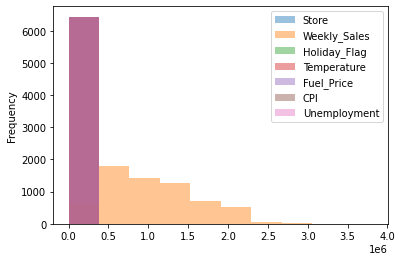

In [33]:
_ = df.plot.hist(bins=10, alpha=0.45)

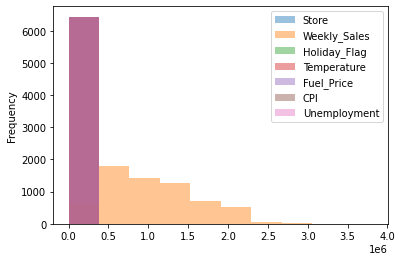

In [34]:
_ = df_sub.plot.hist(bins=10, alpha=0.45)

Text(0, 0.5, 'count of stores')

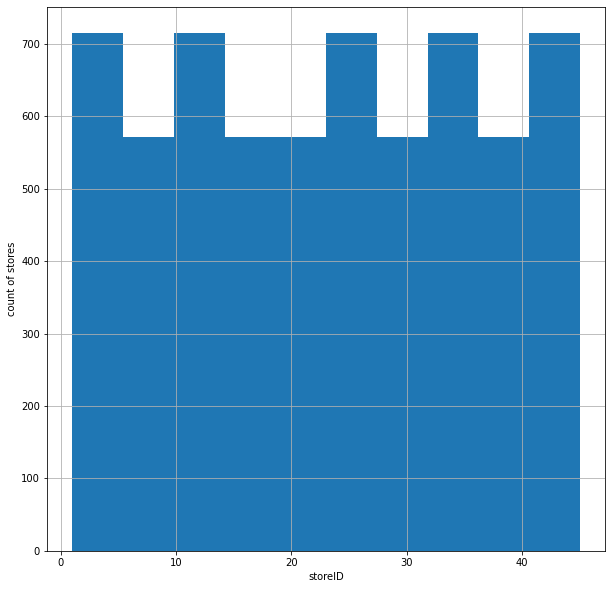

In [35]:
df['Store'].hist(bins=10,figsize =(10,10))
plt.xlabel('storeID')
plt.ylabel('count of stores')

Text(0, 0.5, 'values')

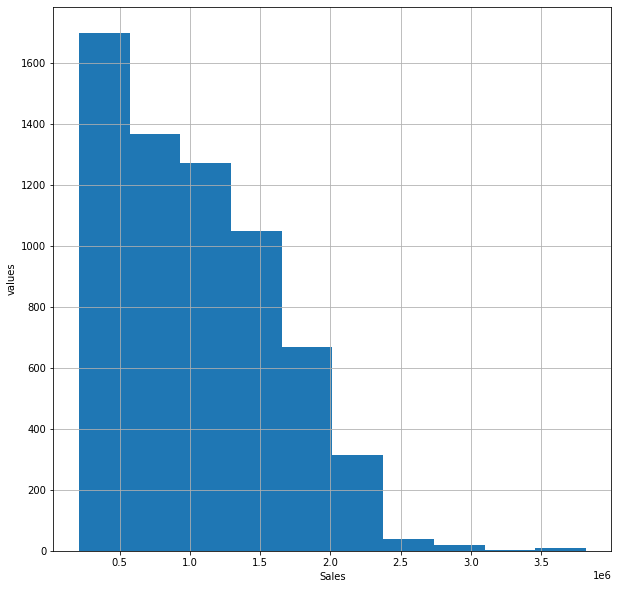

In [36]:
df['Weekly_Sales'].hist(bins=10,figsize =(10,10))
plt.xlabel('Sales')
plt.ylabel('values')

Text(0, 0.5, 'values')

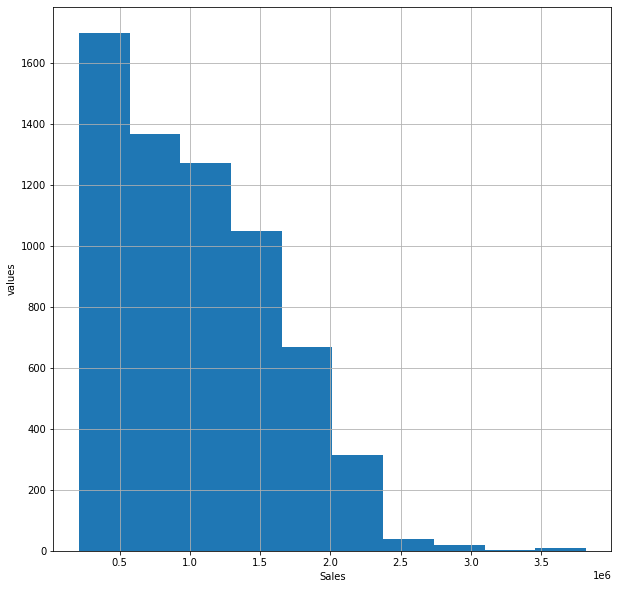

In [37]:
df_sub['Weekly_Sales'].hist(bins=10,figsize =(10,10))
plt.xlabel('Sales')
plt.ylabel('values')

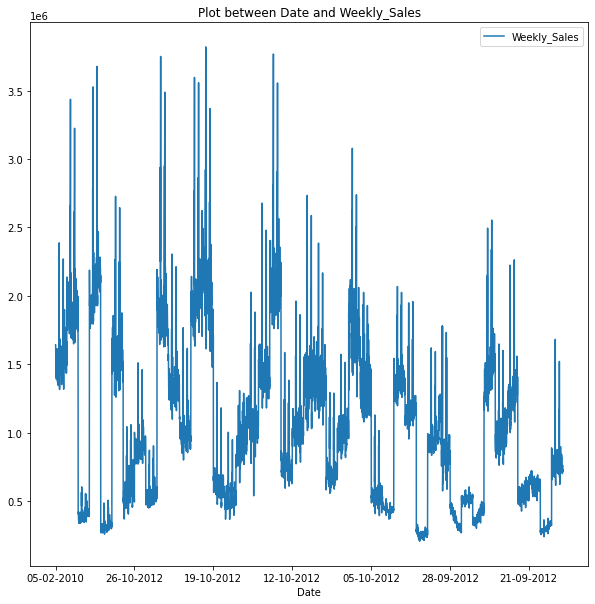

In [38]:
df.plot(x='Date', y='Weekly_Sales', title= "Plot between Date and Weekly_Sales",figsize =(10,10));

plt.show(True);

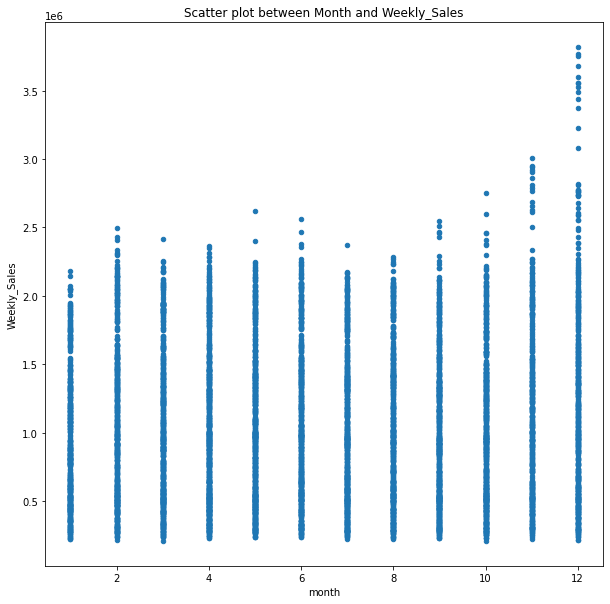

In [39]:
#monthly sales 
df_sub['month'] = pd.DatetimeIndex(df_sub['Date']).month

df_sub.plot.scatter(x='month', y='Weekly_Sales', title= "Scatter plot between Month and Weekly_Sales",figsize =(10,10));

plt.show(True);

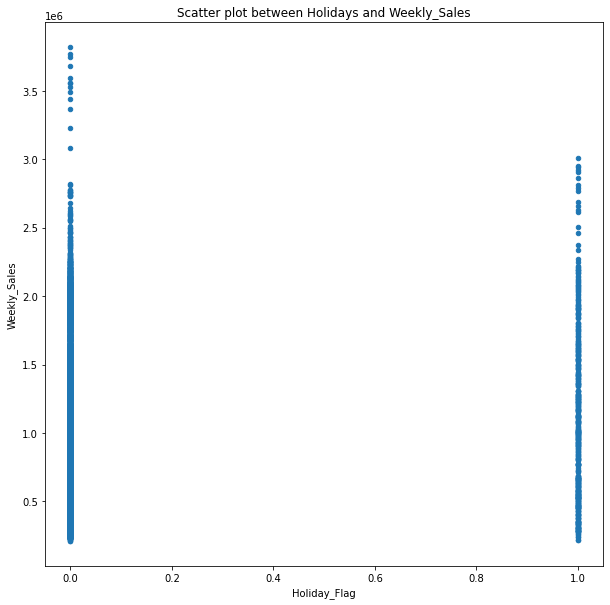

In [40]:
df.plot.scatter(x='Holiday_Flag', y='Weekly_Sales', title= "Scatter plot between Holidays and Weekly_Sales",figsize =(10,10));

plt.show(True);

Text(0, 0.5, 'counts')

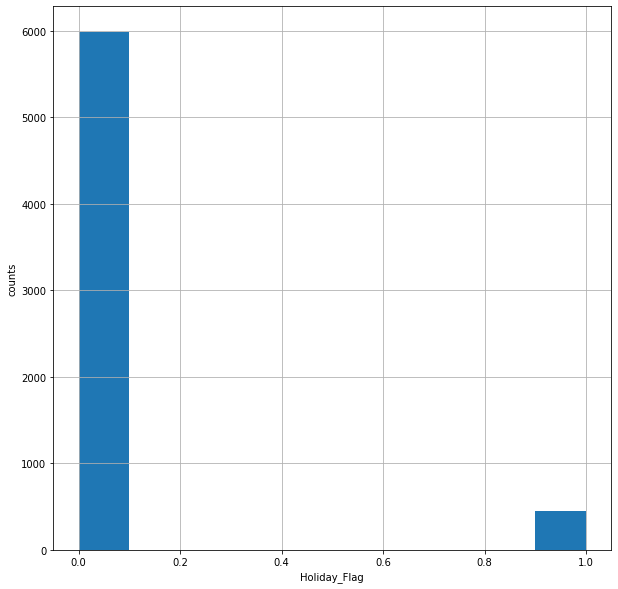

In [41]:
df_sub['Holiday_Flag'].hist(bins=10,figsize =(10,10))
plt.xlabel('Holiday_Flag')
plt.ylabel('counts')

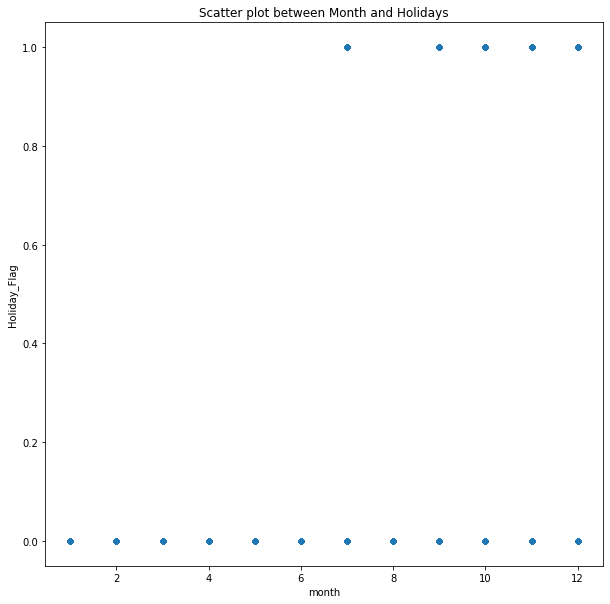

In [42]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df.plot.scatter(x='month', y='Holiday_Flag', title= "Scatter plot between Month and Holidays",figsize =(10,10));

plt.show(True);

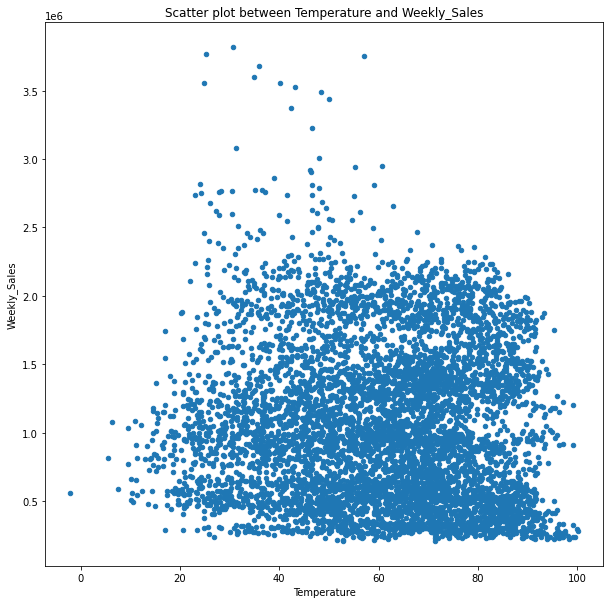

In [43]:
df.plot.scatter(x='Temperature', y='Weekly_Sales', title= "Scatter plot between Temperature and Weekly_Sales",figsize =(10,10));

plt.show(True);

Text(0, 0.5, 'counts')

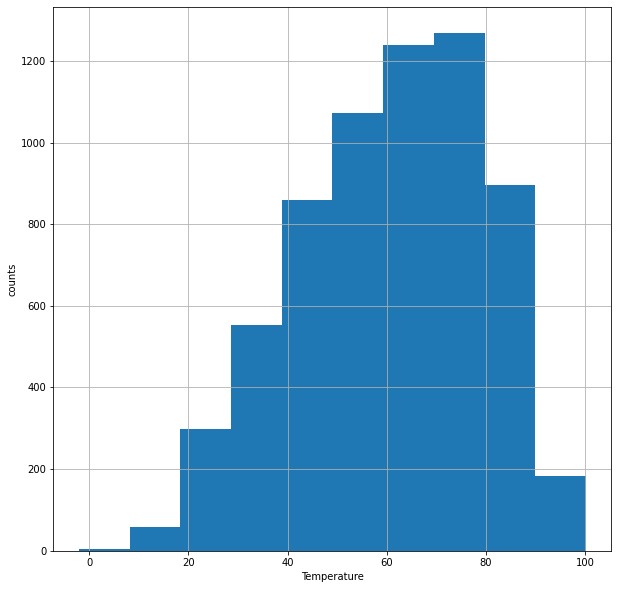

In [44]:
df_sub['Temperature'].hist(bins=10,figsize =(10,10))
plt.xlabel('Temperature')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

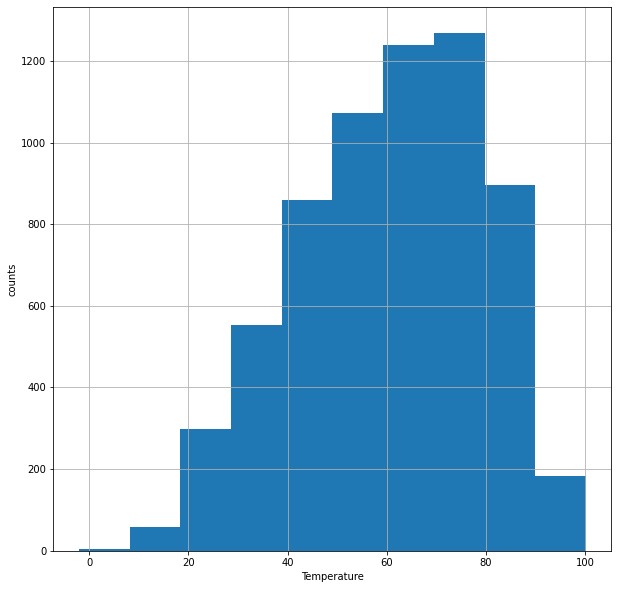

In [45]:
df['Temperature'].hist(bins=10,figsize =(10,10))
plt.xlabel('Temperature')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

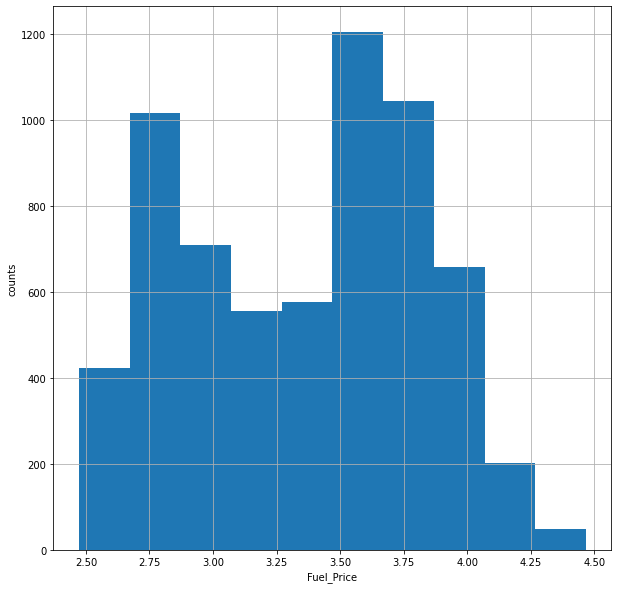

In [46]:
df['Fuel_Price'].hist(bins=10,figsize =(10,10))
plt.xlabel('Fuel_Price')
plt.ylabel('counts')

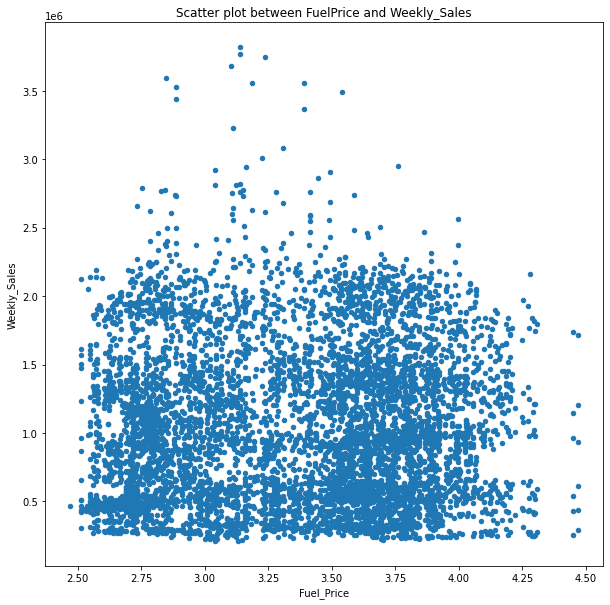

In [47]:
df.plot.scatter(x='Fuel_Price', y='Weekly_Sales', title= "Scatter plot between FuelPrice and Weekly_Sales",figsize =(10,10));

plt.show(True);

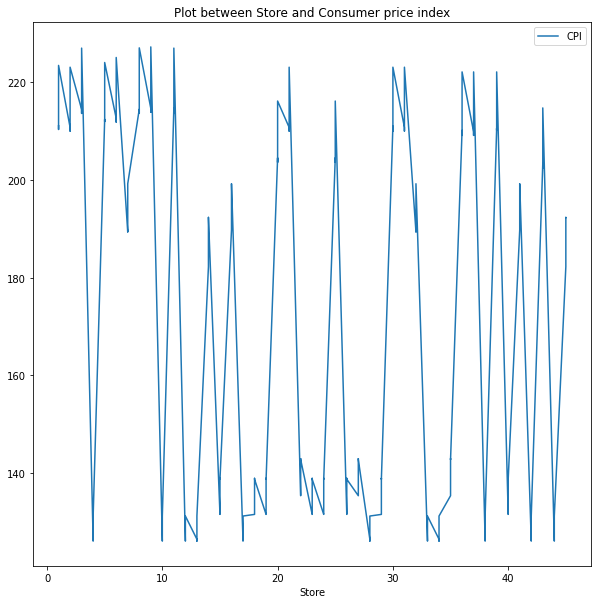

In [48]:
df.plot(x='Store', y='CPI', title= "Plot between Store and Consumer price index",figsize =(10,10));

plt.show(True);

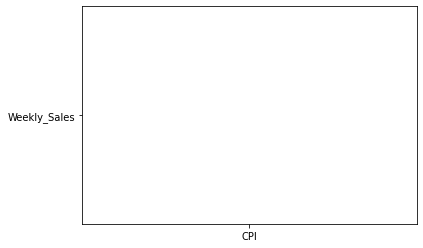

In [57]:

df.plot(y='Weekly_Sales', x='CPI', title= "Plot between CPI and Weekly_Sales",figsize =(10,10) );

plt.show(True);

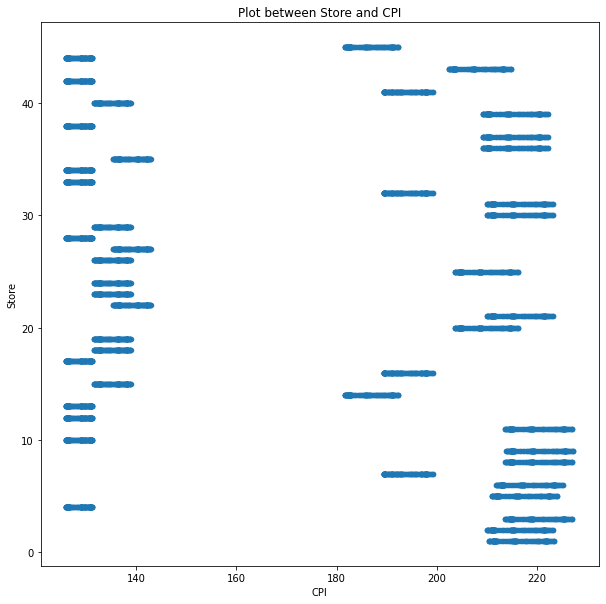

In [59]:

df.plot(kind='scatter', y='Store', x='CPI', title='Plot between Store and CPI', figsize =(10,10))

plt.show(True)

Text(0, 0.5, 'counts')

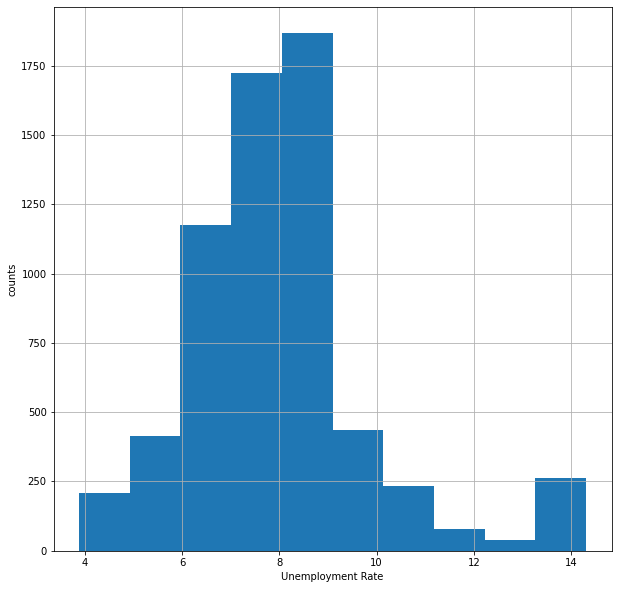

In [60]:
df['Unemployment'].hist(bins=10,figsize =(10,10))
plt.xlabel('Unemployment Rate')
plt.ylabel('counts')

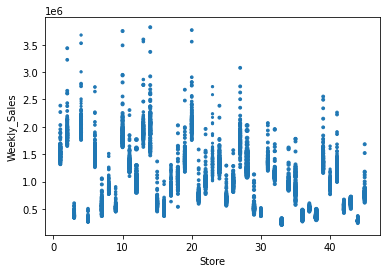

In [61]:
df.plot(kind='scatter', x='Store', y='Weekly_Sales', s=df.Unemployment)

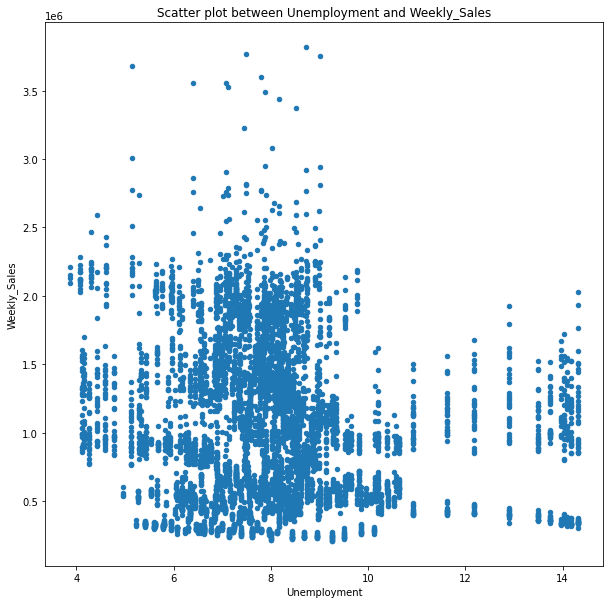

In [62]:
df.plot.scatter(x='Unemployment', y='Weekly_Sales', title= "Scatter plot between Unemployment and Weekly_Sales",figsize =(10,10));

plt.show(True);

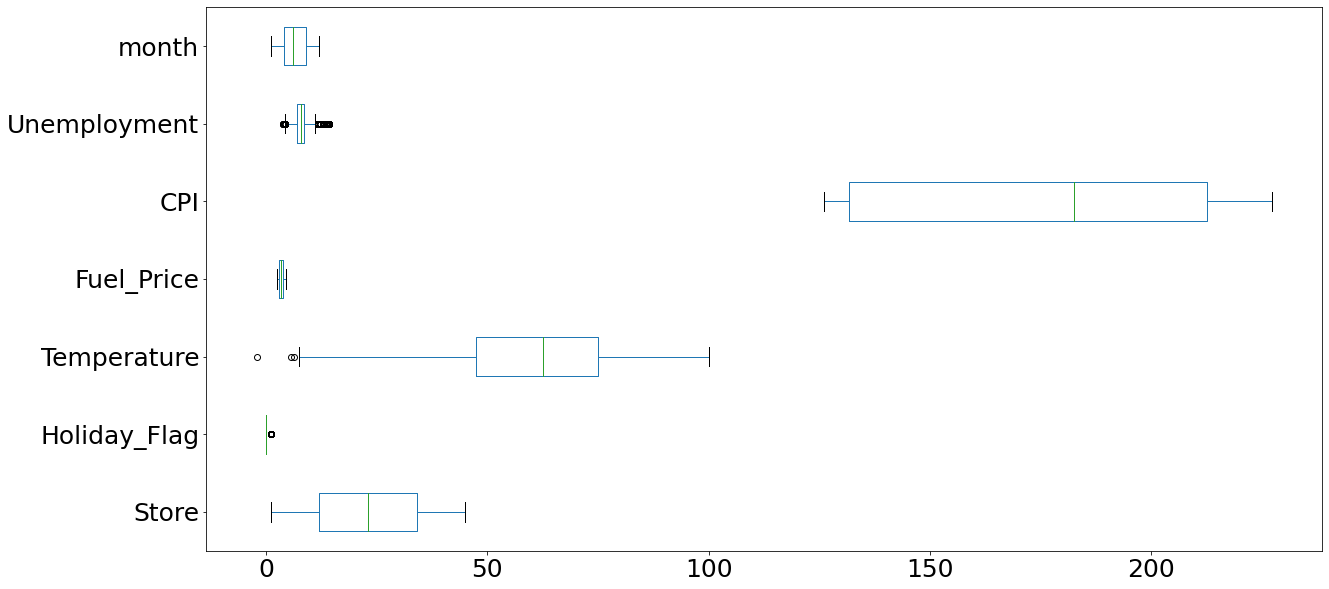

In [71]:

df_new = df.loc[:, df.columns != 'Weekly_Sales']
df_new
f, ax = plt.subplots(figsize=(20, 10))
df_new.boxplot(grid=False, vert=False,fontsize=25, figsize=(10,20))


In [83]:
#Apply outlier removal using the Interquartile range or replacement
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
IQR


Store           22.000000
Holiday_Flag     0.000000
Temperature     27.480000
Fuel_Price       0.802000
CPI             81.008293
Unemployment     1.731000
month            5.000000
dtype: float64

In [84]:
dfno = df_new[~((df_new < (Q1 - 1.5 * IQR)) |(df_new> (Q3 + 1.5 * IQR))).any(axis=1)]


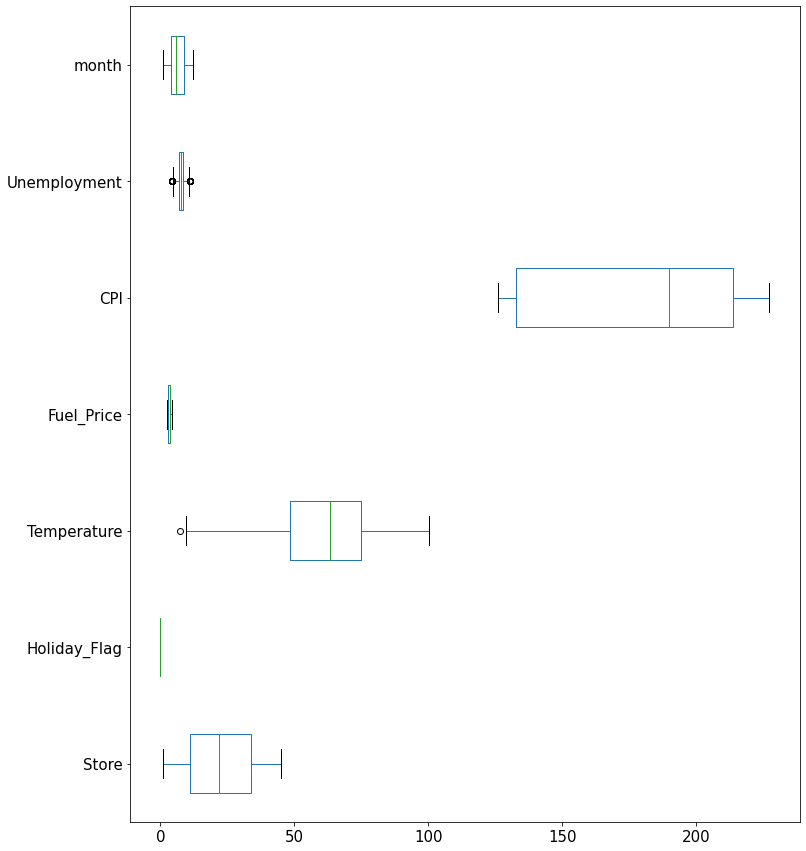

In [85]:
df_box = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

In [86]:
print(df.shape)
print(dfno.shape)
dfno

(6435, 9)
(5533, 8)


,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
0,1,05-02-2010,0,42.31,2.572,211.096358,8.106,5
2,1,19-02-2010,0,39.93,2.514,211.289143,8.106,2
3,1,26-02-2010,0,46.63,2.561,211.319643,8.106,2
4,1,05-03-2010,0,46.50,2.625,211.350143,8.106,5
5,1,12-03-2010,0,57.79,2.667,211.380643,8.106,12
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,0,64.88,3.997,192.013558,8.684,9
6431,45,05-10-2012,0,64.89,3.985,192.170412,8.667,5
6432,45,12-10-2012,0,54.47,4.000,192.327265,8.667,12
6433,45,19-10-2012,0,56.47,3.969,192.330854,8.667,10


Text(0, 0.5, 'values')

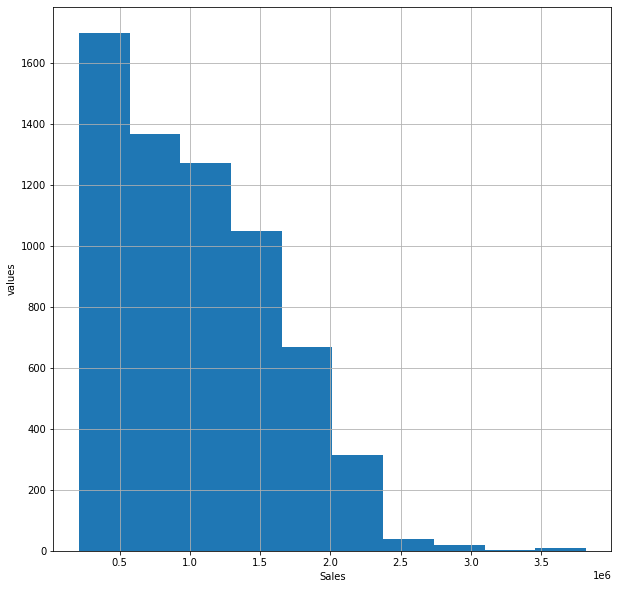

In [80]:
df['Weekly_Sales'].hist(bins=10,figsize =(10,10))
plt.xlabel('Sales')
plt.ylabel('values')

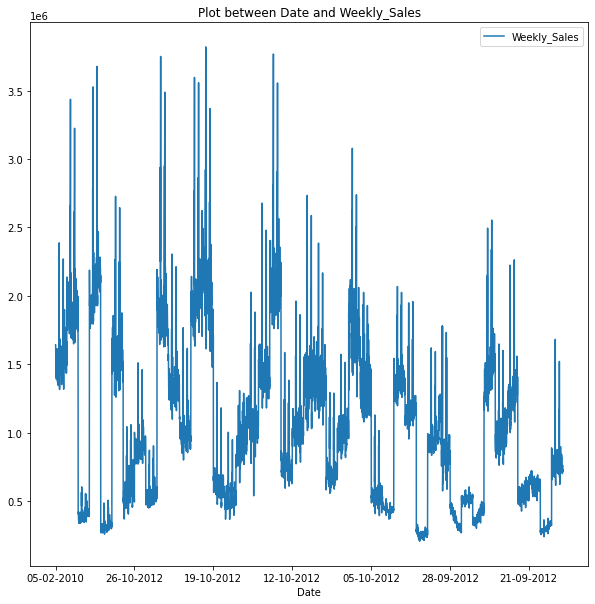

In [81]:
df.plot(x='Date', y='Weekly_Sales', title= "Plot between Date and Weekly_Sales",figsize =(10,10));

plt.show(True);


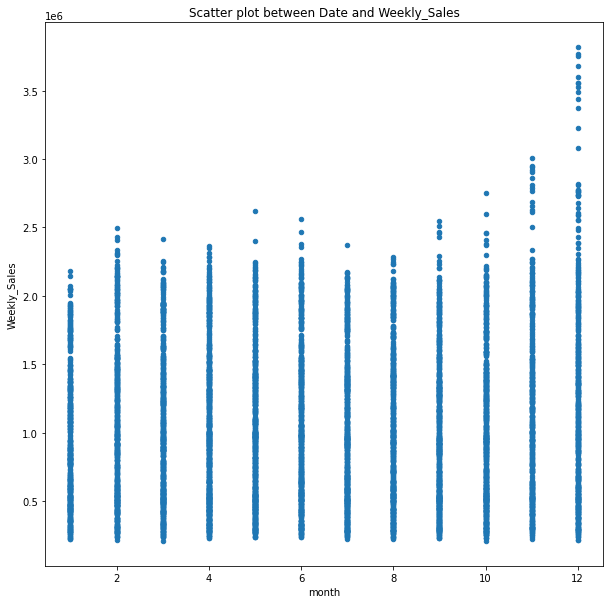

In [82]:
#monthly sales 
df['month'] = pd.DatetimeIndex(df['Date']).month

df.plot.scatter(x='month', y='Weekly_Sales', title= "Scatter plot between Date and Weekly_Sales",figsize =(10,10));

plt.show(True);

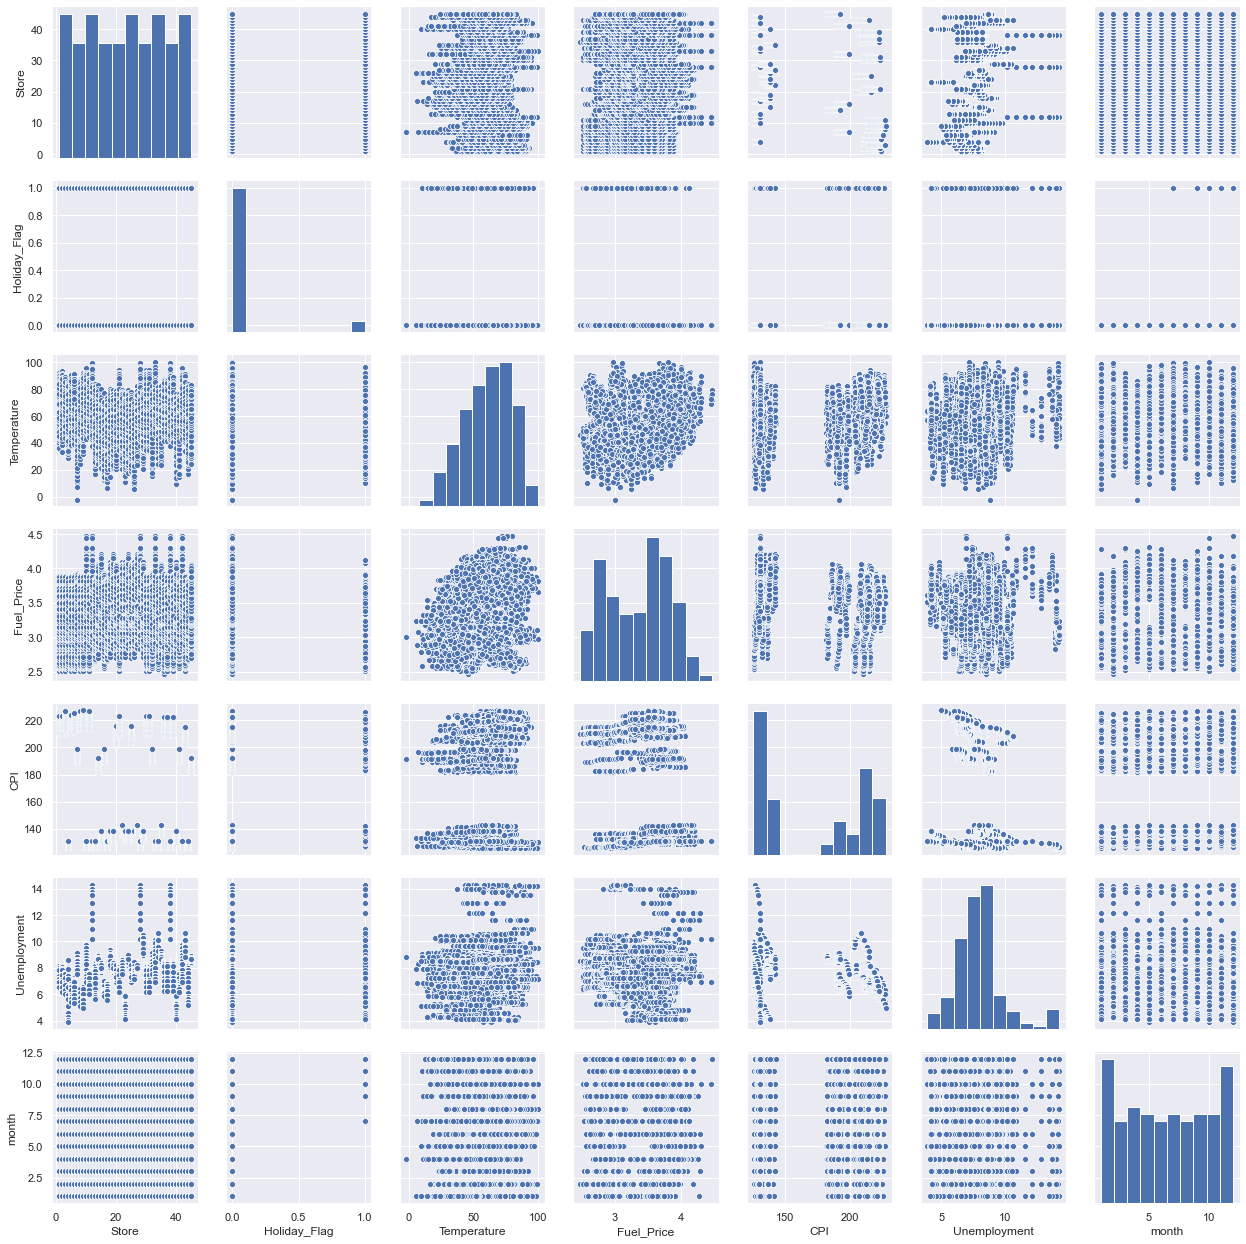

In [90]:
sns.set()
sns.pairplot(df_new)
plt.show()

In [91]:
#Calculate the correlation coefficients
corr = df_new.corr()
print(corr)
corr.isna()

corr.round(2).style.background_gradient(cmap='coolwarm')

                     Store  Holiday_Flag  Temperature  Fuel_Price       CPI  \
Store         1.000000e+00  6.250842e-20    -0.022659    0.060023 -0.209492   
Holiday_Flag  6.250842e-20  1.000000e+00    -0.155091   -0.078347 -0.002162   
Temperature  -2.265908e-02 -1.550913e-01     1.000000    0.144982  0.176888   
Fuel_Price    6.002295e-02 -7.834652e-02     0.144982    1.000000 -0.170642   
CPI          -2.094919e-01 -2.162091e-03     0.176888   -0.170642  1.000000   
Unemployment  2.235313e-01  1.096028e-02     0.101158   -0.034684 -0.302020   
month         3.071631e-19  3.322341e-01     0.066440   -0.052832  0.001479   

              Unemployment         month  
Store             0.223531  3.071631e-19  
Holiday_Flag      0.010960  3.322341e-01  
Temperature       0.101158  6.643970e-02  
Fuel_Price       -0.034684 -5.283174e-02  
CPI              -0.302020  1.478843e-03  
Unemployment      1.000000 -2.061552e-03  
month            -0.002062  1.000000e+00  


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
Store,1.000000,0.000000,-0.020000,0.060000,-0.210000,0.220000,0.000000
Holiday_Flag,0.000000,1.000000,-0.160000,-0.080000,-0.000000,0.010000,0.330000
Temperature,-0.020000,-0.160000,1.000000,0.140000,0.180000,0.100000,0.070000
Fuel_Price,0.060000,-0.080000,0.140000,1.000000,-0.170000,-0.030000,-0.050000
CPI,-0.210000,-0.000000,0.180000,-0.170000,1.000000,-0.300000,0.000000
Unemployment,0.220000,0.010000,0.100000,-0.030000,-0.300000,1.000000,-0.000000
month,0.000000,0.330000,0.070000,-0.050000,0.000000,-0.000000,1.000000


In [92]:
corr_matrix = df_new.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper)

              Store  Holiday_Flag  Temperature  Fuel_Price       CPI  \
Store           NaN  6.250842e-20     0.022659    0.060023  0.209492   
Holiday_Flag    NaN           NaN     0.155091    0.078347  0.002162   
Temperature     NaN           NaN          NaN    0.144982  0.176888   
Fuel_Price      NaN           NaN          NaN         NaN  0.170642   
CPI             NaN           NaN          NaN         NaN       NaN   
Unemployment    NaN           NaN          NaN         NaN       NaN   
month           NaN           NaN          NaN         NaN       NaN   

              Unemployment         month  
Store             0.223531  3.071631e-19  
Holiday_Flag      0.010960  3.322341e-01  
Temperature       0.101158  6.643970e-02  
Fuel_Price        0.034684  5.283174e-02  
CPI               0.302020  1.478843e-03  
Unemployment           NaN  2.061552e-03  
month                  NaN           NaN  


In [93]:
to_drop =[column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

[]
